In [1]:
%conda install matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## ANOVA

### One-way ANOVA

In [2]:
import pandas as pd

example = pd.DataFrame({'A': [25, 30, 28, 36, 29], 'B': [45, 55, 29, 56, 40], 'C': [30, 29, 33, 37, 27]})
display(example)

example_plot = pd.melt(example.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C'])
example_plot.columns = ['index', 'method', 'result']
display(example_plot)

,A,B,C
0,25,45,30
1,30,55,29
2,28,29,33
3,36,56,37
4,29,40,27


,index,method,result
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


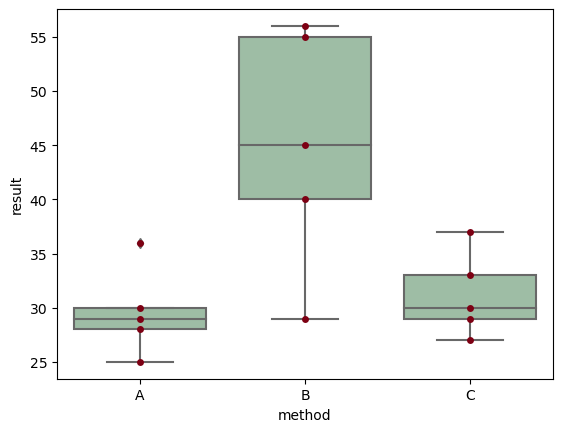

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(x='method', y='result', data=example_plot, color='#99c2a2')
ax = sns.swarmplot(x='method', y='result', data=example_plot, color='#7d0013')
plt.show()

The null hypothesis: means of all populations are equal to each other.  
Alternative Hypothesis: Not all populations mean the same.

In [4]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(example['A'], example['B'], example['C'])
print(fvalue, pvalue)

6.849681528662421 0.01036461841776795


Interpretation: With a P-value of 0.01, there is sufficient grounds to reject the null hypothesis at the 99% confidence level.  
=> Not all populations have the same mean! (There are cases where the means of the population are different!)

If you want to find out which group it is, you should do the HSD test.

The null hypothesis: the means of the two populations are equal to each other.  
Alternative Hypothesis: The means of the two populations are different.

In [5]:
hsd = stats.tukey_hsd(example['A'], example['B'], example['C'])
print(hsd)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -15.400     0.014   -27.606    -3.194
 (0 - 2)     -1.600     0.935   -13.806    10.606
 (1 - 0)     15.400     0.014     3.194    27.606
 (1 - 2)     13.800     0.027     1.594    26.006
 (2 - 0)      1.600     0.935   -10.606    13.806
 (2 - 1)    -13.800     0.027   -26.006    -1.594



Since the p-value of 1 - 0, 1 - 2 is less than 0.03, there is sufficient evidence to reject each null hypothesis at the 97% confidence level.  
=> The mean of population B differs from the mean of population A and population C!

### Two-way ANOVA (w/o Interaction)

In [10]:
example = pd.DataFrame({'Subject': ['Sub1', 'Sub2', 'Sub3', 'Sub4', 'Sub5'], 'A': [1.38, 2.45, 1.22, 1.01, 2.19], 'B': [0.53, 0.43, 1.54, 0.24, 0.54], 'C': [3.24, 2.49, 5.48, 3.23, 1.09]})
display(example.set_index('Subject'))

example = pd.melt(example, id_vars=['Subject'], value_vars=['A', 'B', 'C'])
example.columns = ['subject', 'method', 'result']
display(example)

,A,B,C
Subject,,,
Sub1,1.38,0.53,3.24
Sub2,2.45,0.43,2.49
Sub3,1.22,1.54,5.48
Sub4,1.01,0.24,3.23
Sub5,2.19,0.54,1.09


,subject,method,result
0,Sub1,A,1.38
1,Sub2,A,2.45
2,Sub3,A,1.22
3,Sub4,A,1.01
4,Sub5,A,2.19
5,Sub1,B,0.53
6,Sub2,B,0.43
7,Sub3,B,1.54
8,Sub4,B,0.24
9,Sub5,B,0.54


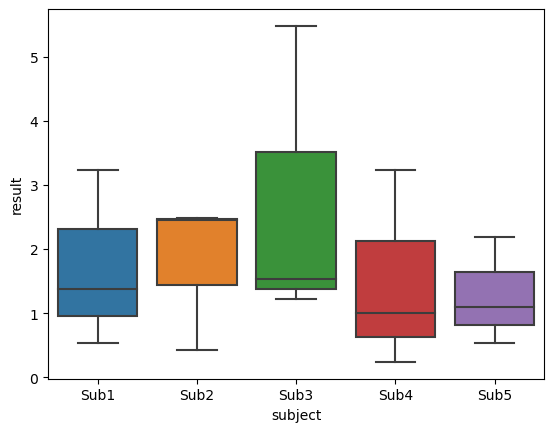

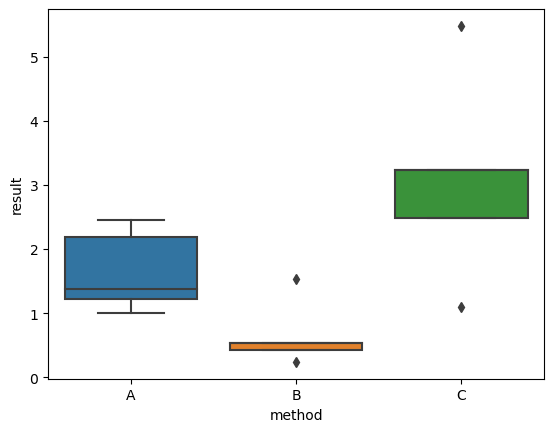

In [11]:
sns.boxplot(x='subject', y='result', data=example)
plt.show()

sns.boxplot(x='method', y='result', data=example)
plt.show()

Null hypothesis 1: Regarding the cause 'subject', the mean of all populations is the same.  
Alternative Hypothesis 1: Regarding the cause 'Subject', not all populations have the same mean.

Null hypothesis 2: Regarding 'method', the means of all populations are equal.  
Alternative Hypothesis 2: Regarding the cause 'method', not all populations have the same mean.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('result ~ C(subject) + C(method)', data=example).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Interpretation: Regarding the cause 'Subject', there is insufficient evidence to reject the null hypothesis because the P-value is 0.52. However, as for the cause 'Method', the P-value is less than 0.02, so there is sufficient grounds to reject the null hypothesis at the 98% confidence level.  
=> Regarding the cause 'Subject', the average of all populations is the same. However, when it comes to the cause 'Method', the mean of all populations is not the same! (There are cases where the means of the population are different!)

## Practice

### One-way ANOVA Practice
The following are the results of IQ tests conducted by five people from each of the three cities.

Check One-way ANOVA to see if the IQ averages of the three cities are the same.

In [ ]:
iq = pd.DataFrame({'City A': [128, 147, 88, 110, 115], 'City B': [110, 113, 115, 107, 125], 'City C': [99, 102, 88, 155, 128]})
display(iq)

First, draw for visual analysis.

In [ ]:
iq_plot = pd.melt(iq.reset_index(), id_vars=['index'], value_vars=['City A', 'City B', 'City C'])
iq_plot.columns = ['index', 'city', 'iq']

ax = sns.boxplot(x='city', y='iq', data=iq_plot, color='#99c2a2')
ax = sns.swarmplot(x='city', y='iq', data=iq_plot, color='#7d0013')
plt.show()

We now establish a hypothesis and perform a one-way ANOVA.

Null hypothesis: The mean IQs of the three cities are equal to each other.  
Alternative Hypothesis: The mean IQs in all three cities are not the same.

In [ ]:
fvalue, pvalue = stats.f_oneway(iq['City A'], iq['City B'], iq['City C'])
print(fvalue, pvalue)

Interpretation: With a P-value of 0.95, there is insufficient evidence to reject the null hypothesis.  
=> The average IQs of the three cities are the same!

### Two-way ANOVA Practice
The following is the result of three test drivers driving four different vehicles and measuring fuel efficiency. (However, it is assumed that there is no connection between the driver and the vehicle type.)

Check the two-way ANOVA to see if the fuel economy averages between the test drivers are all the same, and if the fuel economy averages between the vehicles are all the same.

In [ ]:
fuel = pd.DataFrame({'Driver': ['Driver 1', 'Driver 2', 'Driver 3'], 'BMW': [10.45, 7.98, 14.23], 'Benz': [8.79, 7, 9.23], 'KIA': [10.1, 7.8, 9.58], 'Volvo': [15.09, 13.77, 15.07]})

Draw boxplot

In [ ]:
fuel = pd.melt(fuel, id_vars=['Driver'], value_vars=['BMW', 'Benz', 'KIA', 'Volvo'])
fuel.columns = ['Driver', 'Brand', 'Efficiency']

sns.boxplot(x='Driver', y='Efficiency', data=fuel)
plt.show()

sns.boxplot(x='Brand', y='Efficiency', data=fuel)
plt.show()

Null Hypothesis 1: The average fuel economy among test drivers is the same.  
Alternative Hypothesis 1: Not all test drivers have the same fuel economy average. 

Null Hypothesis 2: The average fuel efficiency between models is the same.  
Alternative Hypothesis 1: Not all fuel efficiency averages between vehicles are the same.

In [ ]:
model = ols('Efficiency ~ C(Driver) + C(Brand)', data=fuel).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Interpretation: In both cases, the P-value is less than 0.05, so there is good grounds for rejecting each null hypothesis at the 95% confidence level.  
=> There are cases where the fuel efficiency average is different between test drivers, and there are cases where the fuel efficiency average is different between vehicles.